#üìå Extrac√£o

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)
display(df.head())

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transforma√ß√£o

In [ ]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])


account_charges_df = account_df[['Charges.Monthly', 'Charges.Total', 'Contract', 'PaperlessBilling', 'PaymentMethod']]


df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_charges_df], axis=1)

display(df.head())

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies Charges.Monthly  \
0               No         Yes         Yes              No            65.6   
1               No          No          No             Yes            59.9   
2              Yes          No          No              No            73.9   
3              Yes          No         Yes             Yes            98.0   
4               No         Yes         Yes              No            83.9   

   Charges.Total        Contract PaperlessBilling     PaymentMethod  
0          593.3        One year              Yes      Mailed check  
1          542.4  Month-to-month               No      Mailed check  
2         280.85  Month-to-month              Yes  Electronic check  
3        1237.85  Month-to-month              Yes  Electronic check  
4          267.4  Month-to-month              Yes      Mailed check  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Charges.Monthly   7267 non-null   float64


In [ ]:
# Exibir valores √∫nicos e contagem de valores para algumas colunas categ√≥ricas
categorical_cols_to_explore = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols_to_explore:
    print(f"Coluna: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Coluna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
------------------------------
Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64
------------------------------
Coluna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
------------------------------
Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64
------------------------------
Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
------------------------------
Coluna: Contract
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64
------------------------------
Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
------------------------------
Coluna: PaperlessBilling
PaperlessBilling
Yes    4311
No     2956
Name: count, dtype: int64
------------------------------
Coluna: PaymentMe

Nota-se 224 valores ' ' em churn. A seguir ser√° reaizado o tratamento de dados

## Limpeza e transforma√ß√£o de dados


Tratar os valores vazios na coluna `Churn` e converter a coluna `Charges.Total` para tipo num√©rico, tratando poss√≠veis erros.


In [ ]:
df = df[df['Churn'].str.strip() != '']
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.dropna(subset=['Charges.Total'], inplace=True)
display(df.info())
display(df['Charges.Total'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Charges.Monthly   7032 non-null   float64
 17  

None

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

In [ ]:
df['Contas_Diarias'] = df['Charges.Monthly'] / 30
display(df.head())

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies Charges.Monthly Charges.Total  \
0         Yes         Yes              No            65.6        593.30   
1          No          No             Yes            59.9        542.40   
2          No          No              No            73.9        280.85   
3          No         Yes             Yes            98.0       1237.85   
4         Yes         Yes              No            83.9        267.40   

         Contract  PaperlessBilling     PaymentMethod Contas_Diarias  
0        One year               Yes      Mailed check       2.186667  
1  Month-to-month                No      Mailed check       1.996667  
2  Month-to-month               Yes  Electronic check       2.463333  
3  Month-to-month               Yes  Electronic check       3.266667  
4  Month-to-month               Yes      Mailed check       2.796667  

[5 rows x 22 columns]

## Convers√£o de vari√°veis categ√≥ricas

Converter as vari√°veis categ√≥ricas relevantes para um formato num√©rico (usando t√©cnicas como One-Hot Encoding, por exemplo) para que a correla√ß√£o possa ser calculada.


In [ ]:
base = df.copy()

In [ ]:

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')


binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multi_cat_cols = [col for col in categorical_cols if df[col].nunique() > 2]


for col in binary_cols:

    unique_values = df[col].unique()
    if 'No' in unique_values and 'Yes' in unique_values:
        df[col] = df[col].map({'No': 0, 'Yes': 1})

    elif 'No internet service' in unique_values and 'Yes' in unique_values:
         df[col] = df[col].map({'No internet service': 0, 'Yes': 1})
    elif 'No phone service' in unique_values and 'Yes' in unique_values:
         df[col] = df[col].map({'No phone service': 0, 'Yes': 1})



df = pd.get_dummies(df, columns=multi_cat_cols, dtype=int)

display(df.head())
display(df.info())

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0  Female              0        1           1       9   
1  0003-MKNFE      0    Male              0        0           0       9   
2  0004-TLHLJ      1    Male              0        0           0       4   
3  0011-IGKFF      1    Male              1        1           0      13   
4  0013-EXCHZ      1  Female              1        1           0       3   

   PhoneService  Charges.Monthly  Charges.Total  ...  StreamingMovies_No  \
0             1             65.6         593.30  ...                   1   
1             1             59.9         542.40  ...                   0   
2             1             73.9         280.85  ...                   1   
3             1             98.0        1237.85  ...                   0   
4             1             83.9         267.40  ...                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    1   
2                                    0                    0   
3                                    0                    1   
4                                    0                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        0                  1                  0   
1                        1                  0                  0   
2                        1                  0                  0   
3                        1                  0                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               1   
3                                      0                               1   
4                                      0                               0   

   PaymentMethod_Mailed check  
0                           1  
1                           1  
2                           0  
3                           0  
4                           1  

[5 rows x 43 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   Churn                                    7032 non-null   int64  
 2   gender                                   7032 non-null   object 
 3   SeniorCitizen                            7032 non-null   int64  
 4   Partner                                  7032 non-null   int64  
 5   Dependents                               7032 non-null   int64  
 6   tenure                                   7032 non-null   int64  
 7   PhoneService                             7032 non-null   int64  
 8   Charges.Monthly                          7032 non-null   float64
 9   Charges.Total                            7032 non-null   float64
 10  PaperlessBilling                         7032 non-nul

None

#üìä Carga e an√°lise

In [ ]:
display(df.describe())

Churn  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.265785       0.162400     0.482509     0.298493    32.421786   
std       0.441782       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  Charges.Monthly  Charges.Total  PaperlessBilling  \
count   7032.000000      7032.000000    7032.000000       7032.000000   
mean       0.903299        64.798208    2283.300441          0.592719   
std        0.295571        30.085974    2266.771362          0.491363   
min        0.000000        18.250000      18.800000          0.000000   
25%        1.000000        35.587500     401.450000          0.000000   
50%        1.000000        70.350000    1397.475000          1.000000   
75%        1.000000        89.862500    3794.737500          1.000000   
max        1.000000       118.750000    8684.800000          1.000000   

       Contas_Diarias  ...  StreamingMovies_No  \
count     7032.000000  ...         7032.000000   
mean         2.159940  ...            0.395478   
std          1.002866  ...            0.488988   
min          0.608333  ...            0.000000   
25%          1.186250  ...            0.000000   
50%          2.345000  ...            0.000000   
75%          2.995417  ...            1.000000   
max          3.958333  ...            1.000000   

       StreamingMovies_No internet service  StreamingMovies_Yes  \
count                          7032.000000          7032.000000   
mean                              0.216155             0.388367   
std                               0.411650             0.487414   
min                               0.000000             0.000000   
25%                               0.000000             0.000000   
50%                               0.000000             0.000000   
75%                               0.000000             1.000000   
max                               1.000000             1.000000   

       Contract_Month-to-month  Contract_One year  Contract_Two year  \
count              7032.000000        7032.000000        7032.000000   
mean                  0.551052           0.209329           0.239619   
std                   0.497422           0.406858           0.426881   
min                   0.000000           0.000000           0.000000   
25%                   0.000000           0.000000           0.000000   
50%                   1.000000           0.000000           0.000000   
75%                   1.000000           0.000000           0.000000   
max                   1.000000           1.000000           1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7032.000000   
mean                                  0.219283   
std                                   0.413790   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7032.000000                     7032.000000   
mean                                0.216297                        0.336320   
std                                 0.411748                        0.472483   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                

## C√°lculo de correla√ß√£o


Calcular a correla√ß√£o entre as vari√°veis num√©ricas e a vari√°vel `Churn` (j√° convertida para num√©rica).


In [ ]:

correlation_matrix = df.corr(numeric_only=True)


churn_correlation = correlation_matrix['Churn']


sorted_churn_correlation = churn_correlation.abs().sort_values(ascending=False)


sorted_churn_correlation = sorted_churn_correlation.drop('Churn')


print("Correla√ß√£o com a vari√°vel 'Churn' (ordenado por valor absoluto):")
display(sorted_churn_correlation)

Correla√ß√£o com a vari√°vel 'Churn' (ordenado por valor absoluto):


Contract_Month-to-month                    0.404565
tenure                                     0.354049
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
Contract_Two year                          0.301552
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
OnlineSecurity_No internet service         0.227578
TechSupport_No internet service            0.227578
StreamingTV_No internet service            0.227578
InternetService_No                         0.227578
OnlineBackup_No internet service           0.227578
DeviceProtection_No internet service       0.227578
StreamingMovies_No internet service        0.227578
Charges.Total                              0.199484
Contas_Diarias                             0.192858
Charges.Monthly                            0.192858
PaperlessBilling                           0.191454
Contract_One year                          0.178225
OnlineSecurity_Yes                         0.171270
TechSupport_Yes                            0.164716
Dependents                                 0.163128
SeniorCitizen                              0.150541
Partner                                    0.149982
PaymentMethod_Credit card (automatic)      0.134687
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
InternetService_DSL                        0.124141
PaymentMethod_Bank transfer (automatic)    0.118136
PaymentMethod_Mailed check                 0.090773
OnlineBackup_Yes                           0.082307
DeviceProtection_Yes                       0.066193
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
MultipleLines_No                           0.032654
MultipleLines_No phone service             0.011691
PhoneService                               0.011691
Name: Churn, dtype: float64

## Visualiza√ß√£o da correla√ß√£o


Exibir a matriz de correla√ß√£o ou um mapa de calor para visualizar as rela√ß√µes.


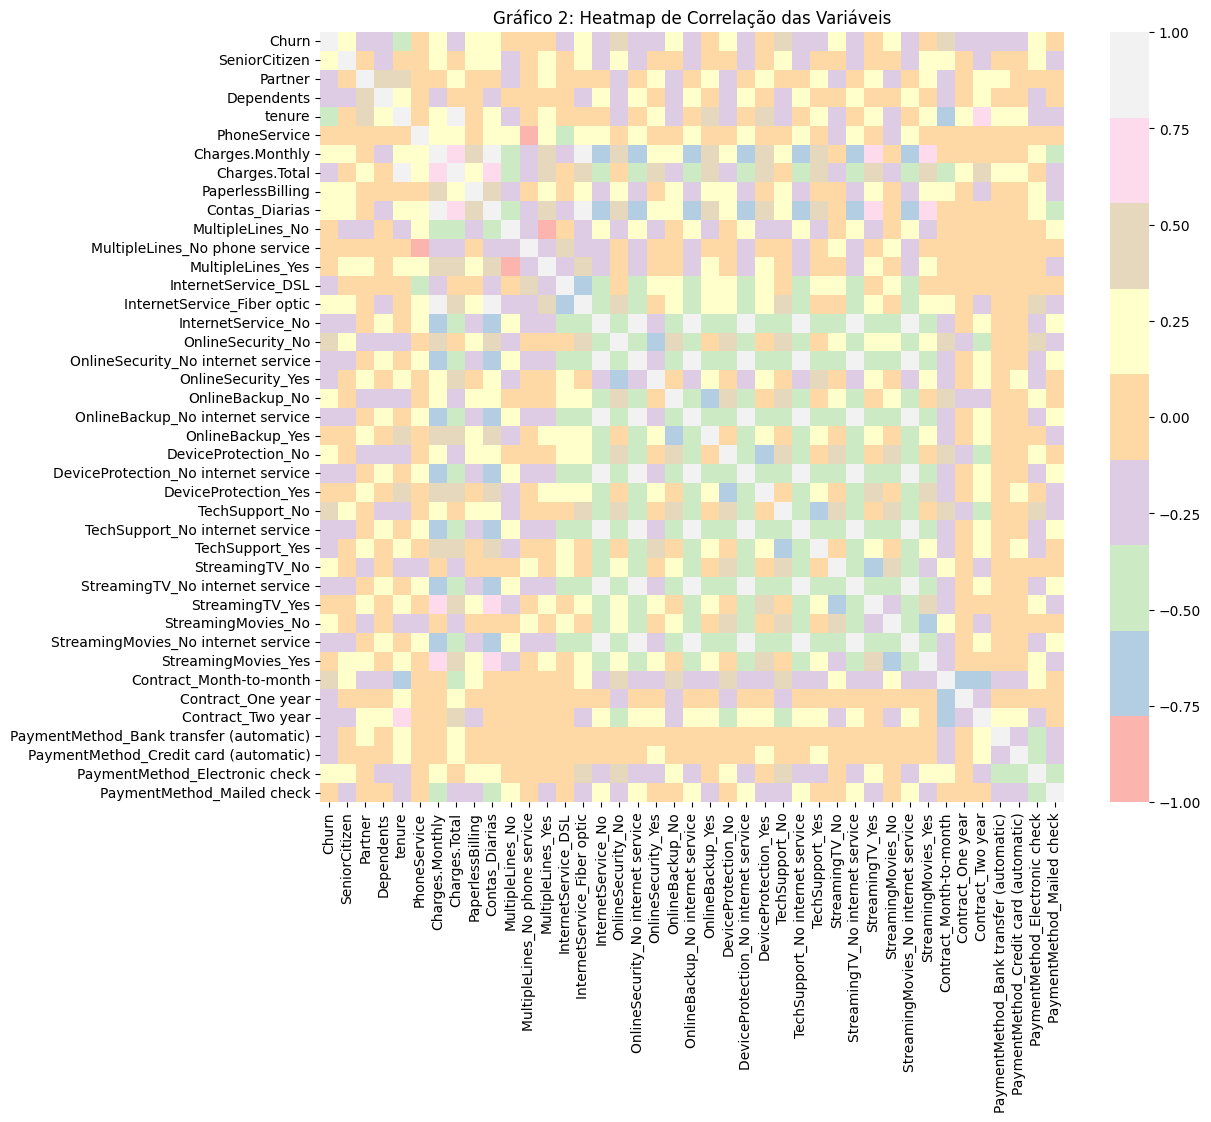

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='Pastel1', annot=False)
plt.title("Gr√°fico 2: Heatmap de Correla√ß√£o das Vari√°veis")
plt.show()

/tmp/ipython-input-103-3230369692.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=pastel_palette)
/tmp/ipython-input-103-3230369692.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Churn', palette=pastel_palette)


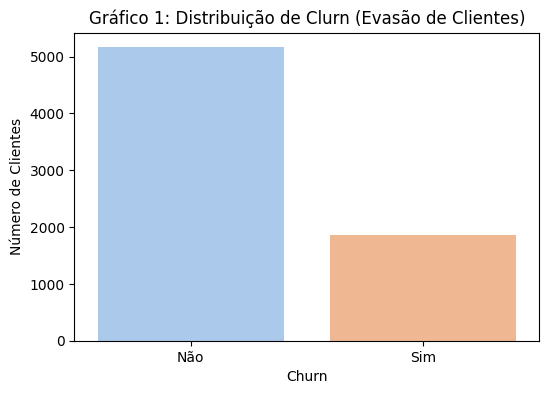

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Churn', palette=pastel_palette)
plt.title('Gr√°fico 1: Distribui√ß√£o de Clurn (Evas√£o de Clientes)')
plt.xlabel('Churn')
plt.ylabel('N√∫mero de Clientes')
plt.xticks([0, 1], ['N√£o', 'Sim'])
plt.show()

/tmp/ipython-input-107-1827326995.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)


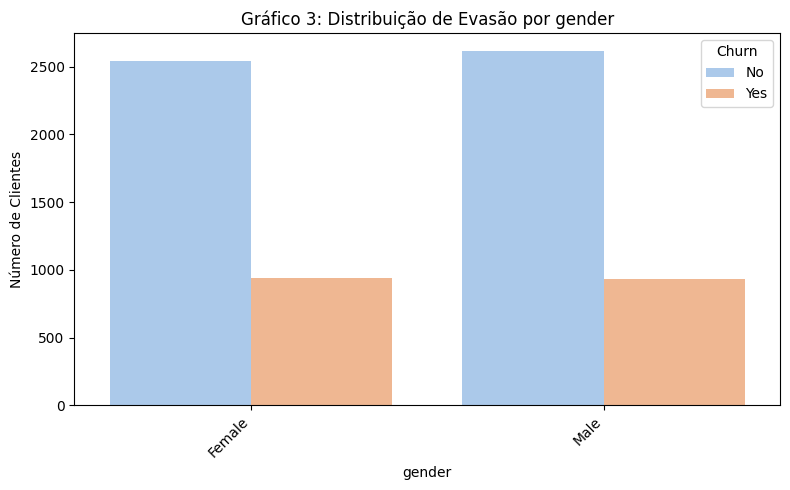

/tmp/ipython-input-107-1827326995.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)


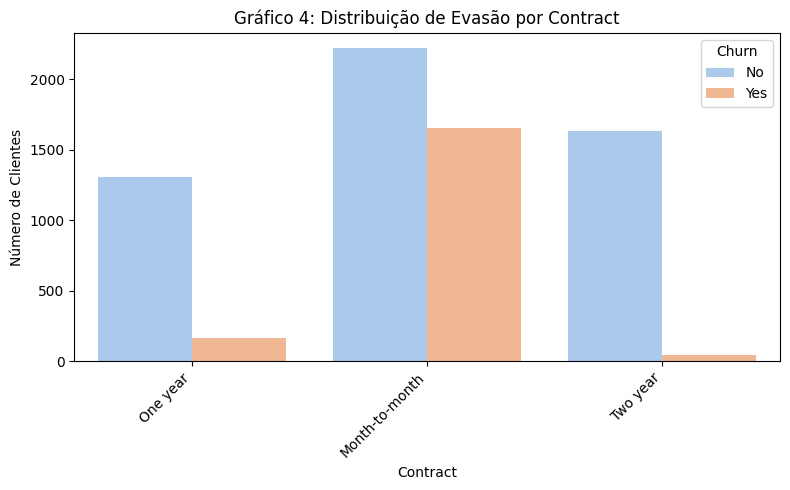

/tmp/ipython-input-107-1827326995.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)


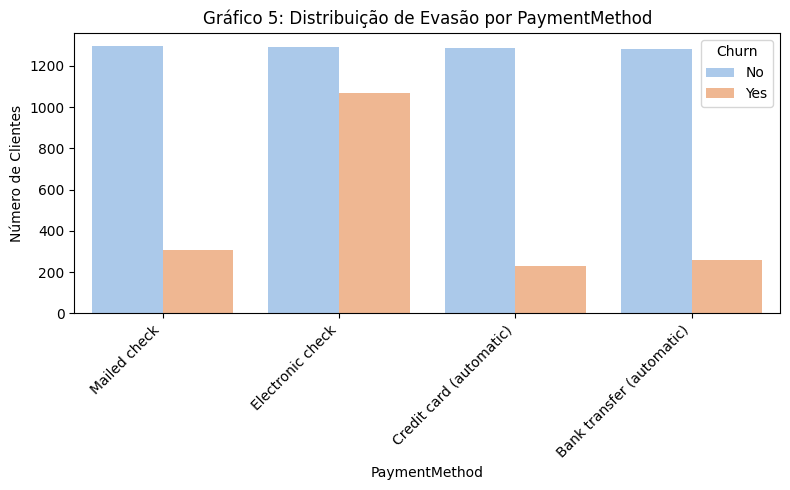

/tmp/ipython-input-107-1827326995.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)


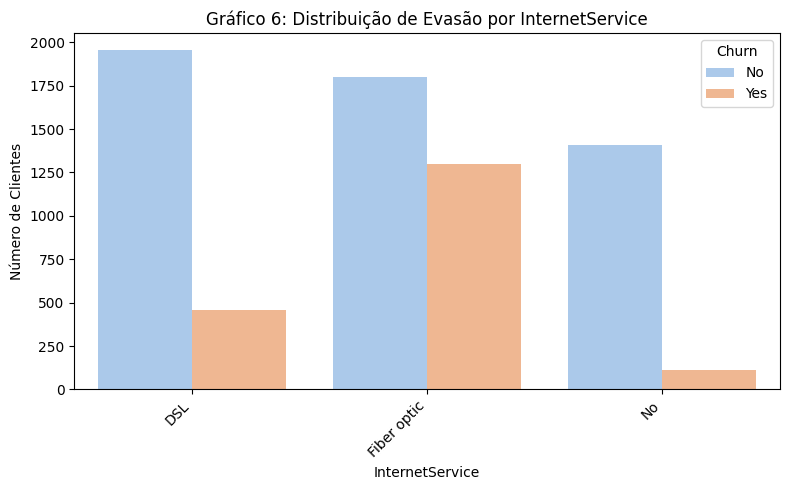

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


categorical_cols_for_churn_analysis = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

pastel_palette = sns.color_palette("pastel")



graph_number = 3
for col in categorical_cols_for_churn_analysis:
    plt.figure(figsize=(8, 5))

    sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)
    plt.title(f'Gr√°fico {graph_number}: Distribui√ß√£o de Evas√£o por {col}')
    plt.xlabel(col)
    plt.ylabel('N√∫mero de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    graph_number += 1

/tmp/ipython-input-106-1699123889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
/tmp/ipython-input-106-1699123889.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)


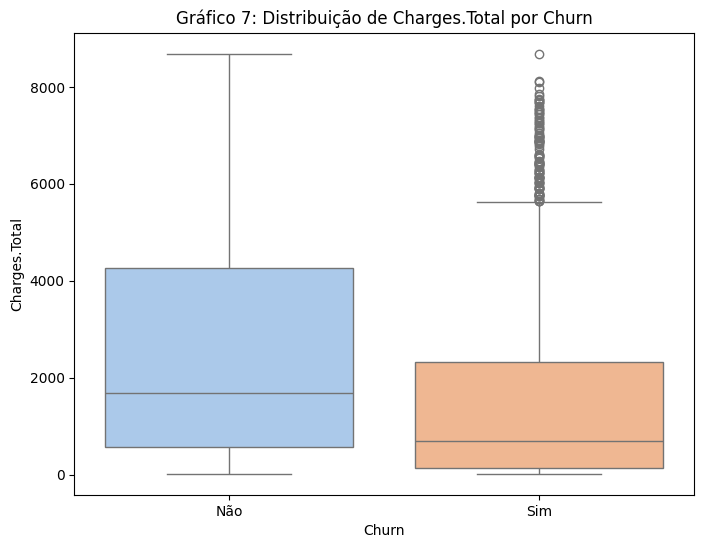

/tmp/ipython-input-106-1699123889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
/tmp/ipython-input-106-1699123889.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)


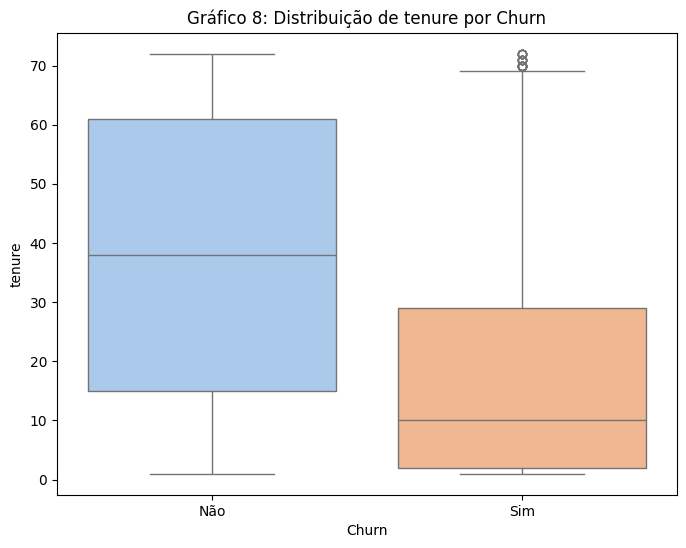

/tmp/ipython-input-106-1699123889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
/tmp/ipython-input-106-1699123889.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)


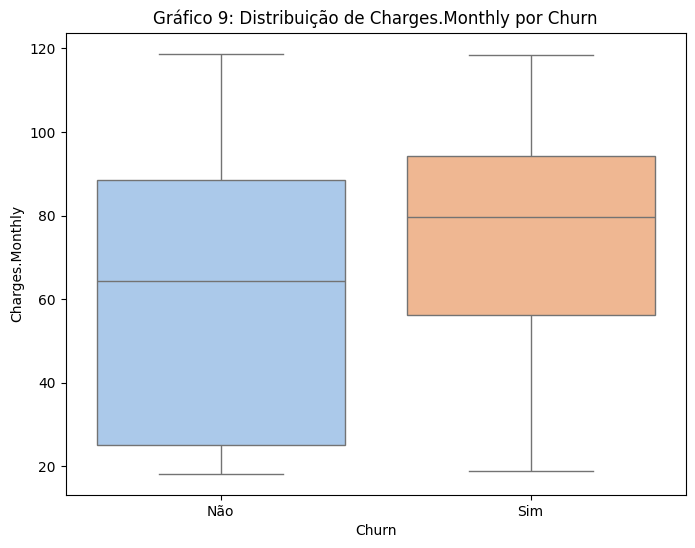

/tmp/ipython-input-106-1699123889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
/tmp/ipython-input-106-1699123889.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)


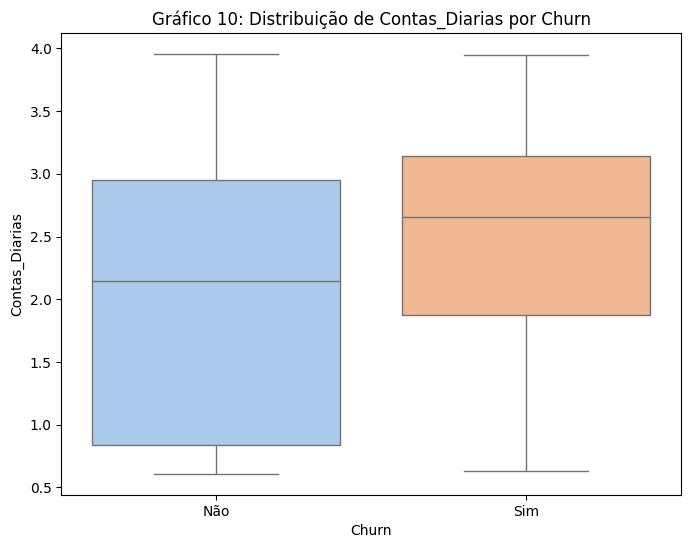

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_to_compare = ['Charges.Total', 'tenure', 'Charges.Monthly', 'Contas_Diarias']


pastel_palette = sns.color_palette("pastel")


graph_number = 7
for col in numerical_cols_to_compare:
    plt.figure(figsize=(8, 6))

    sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
    plt.title(f'Gr√°fico {graph_number}: Distribui√ß√£o de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.xticks([0, 1], ['N√£o', 'Sim'])
    plt.show()
    graph_number += 1

#üìÑRelatorio Final

## Introdu√ß√£o

Este relat√≥rio apresenta uma an√°lise explorat√≥ria do conjunto de dados de clientes da TelecomX com o objetivo de entender o fen√¥meno da evas√£o de clientes (Churn). A evas√£o representa um desafio significativo para empresas de telecomunica√ß√µes, impactando diretamente a receita e o crescimento. Identificar os fatores que levam os clientes a cancelar seus servi√ßos √© crucial para desenvolver estrat√©gias de reten√ß√£o eficazes.

## Limpeza e Tratamento de Dados

Os dados foram carregados a partir de um arquivo JSON. Durante a fase de limpeza e tratamento, foram realizados os seguintes passos:

*   **Normaliza√ß√£o de Dados:** As informa√ß√µes aninhadas nas colunas 'customer', 'phone', 'internet' e 'account' foram extra√≠das e expandidas em colunas separadas para facilitar a an√°lise.
*   **Tratamento de Valores Vazios na Coluna 'Churn':** Identificamos 224 valores vazios na coluna 'Churn', que foram removidos do conjunto de dados para garantir a integridade da an√°lise da vari√°vel resposta.
*   **Convers√£o de Tipo de Dados:** A coluna 'Charges.Total', inicialmente identificada como tipo 'object', foi convertida para um tipo num√©rico (`float64`). Valores n√£o num√©ricos que causaram erros na convers√£o foram tratados, resultando na remo√ß√£o de algumas linhas com dados inconsistentes nesta coluna.
*   **Cria√ß√£o da Coluna 'Contas_Diarias':** Uma nova coluna, 'Contas_Diarias', foi criada dividindo o 'Charges.Monthly' por 30 para obter uma estimativa do custo di√°rio dos servi√ßos, proporcionando uma granularidade maior na an√°lise de custos.
*   **Convers√£o de Vari√°veis Categ√≥ricas:** Vari√°veis categ√≥ricas foram convertidas para um formato num√©rico (utilizando One-Hot Encoding para vari√°veis com mais de duas categorias e mapeamento para vari√°veis bin√°rias) para permitir o c√°lculo de correla√ß√µes e preparativos para poss√≠veis modelagens futuras.

## An√°lise Explorat√≥ria de Dados

A an√°lise explorat√≥ria de dados (EDA) foi realizada para entender a distribui√ß√£o das vari√°veis e suas rela√ß√µes com a evas√£o.

*   **Distribui√ß√£o de Churn:** A an√°lise da distribui√ß√£o da vari√°vel Churn (visualizada no **Gr√°fico 1: Distribui√ß√£o de Clientes por Evas√£o**) mostrou a propor√ß√£o de clientes que evadiram ('Sim') versus os que permaneceram ('N√£o'). Isso nos deu uma linha de base sobre a magnitude do problema de evas√£o no conjunto de dados.

*   **Correla√ß√£o com a Vari√°vel Churn:** Calculamos a correla√ß√£o entre as vari√°veis num√©ricas (incluindo as resultantes do One-Hot Encoding) e a vari√°vel Churn (convertida para 0 e 1). A visualiza√ß√£o da matriz de correla√ß√£o (**Gr√°fico 2: Heatmap de Correla√ß√£o das Vari√°veis**) e a lista de correla√ß√µes ordenadas por valor absoluto destacaram as vari√°veis com maior associa√ß√£o √† evas√£o.
    *   As vari√°veis com maior correla√ß√£o positiva com a evas√£o (`Churn`) incluem: **Contract\_Month-to-month** (clientes com contrato mensal), **InternetService\_Fiber optic** (clientes com servi√ßo de internet de fibra √≥ptica), **PaymentMethod\_Electronic check** (clientes que pagam com cheque eletr√¥nico), **OnlineSecurity\_No**, **TechSupport\_No**, **OnlineBackup\_No**, e **DeviceProtection\_No** (clientes que n√£o assinam servi√ßos de seguran√ßa online, suporte t√©cnico, backup online e prote√ß√£o de dispositivo, respectivamente).
    *   As vari√°veis com maior correla√ß√£o negativa (ou seja, associadas √† *n√£o* evas√£o) incluem: **tenure** (tempo de contrato - clientes com mais tempo de contrato), **Contract\_Two year** (clientes com contrato de dois anos), **Contract\_One year** (clientes com contrato de um ano), e servi√ßos adicionais com "Yes" (embora com menor magnitude de correla√ß√£o que os "No").
    *   **Charges.Monthly** e **Contas\_Diarias** mostram uma correla√ß√£o positiva moderada com Churn.

*   **Distribui√ß√£o de Churn por Vari√°veis Categ√≥ricas:** Gr√°ficos de contagem foram gerados para visualizar a distribui√ß√£o de Churn em rela√ß√£o a vari√°veis categ√≥ricas importantes como G√™nero, Tipo de Contrato, M√©todo de Pagamento e Servi√ßo de Internet (**Gr√°fico 3: Distribui√ß√£o de Evas√£o por Vari√°veis Categ√≥ricas**). Essa an√°lise permitiu observar padr√µes de evas√£o dentro de cada categoria.
    *   **G√™nero:** A an√°lise n√£o mostrou uma diferen√ßa significativa na taxa de evas√£o entre clientes do g√™nero masculino e feminino.
    *   **Tipo de Contrato:** Clientes com contratos **Month-to-month** apresentam uma taxa de evas√£o consideravelmente maior em compara√ß√£o com clientes com contratos de um ou dois anos.
    *   **M√©todo de Pagamento:** O m√©todo de pagamento **Electronic check** est√° associado a uma propor√ß√£o maior de evas√£o em compara√ß√£o com outros m√©todos.
    *   **Servi√ßo de Internet:** Clientes com servi√ßo de internet **Fiber optic** parecem ter uma taxa de evas√£o maior do que aqueles com DSL ou sem servi√ßo de internet.

*   **Distribui√ß√£o de Vari√°veis Num√©ricas por Churn:** Box plots foram utilizados para comparar a distribui√ß√£o de vari√°veis num√©ricas como 'Charges.Total', 'tenure', 'Charges.Monthly' e 'Contas_Diarias' entre os clientes que evadiram e os que n√£o evadiram (**Gr√°fico 4: Distribui√ß√£o de Vari√°veis Num√©ricas por Churn**).
    *   **tenure:** Clientes que evadiram tendem a ter um **tempo de contrato (tenure) significativamente menor** do que os clientes que permaneceram.
    *   **Charges.Monthly** e **Contas\_Diarias:** Clientes que evadiram tendem a ter **cobran√ßas mensais e di√°rias mais altas** em m√©dia do que os clientes que n√£o evadem.
    *   **Charges.Total:** Clientes que evadiram tendem a ter um **total gasto (Charges.Total) menor** do que os clientes que n√£o evadiram, o que faz sentido, pois eles tiveram um tempo de contrato menor.

## Conclus√µes e Insights

Com base na an√°lise realizada, os seguintes insights foram identificados:

*   Os **clientes com maior probabilidade de evadir** s√£o aqueles com **contratos mensais**, que utilizam **servi√ßo de internet de fibra √≥ptica**, pagam com **cheque eletr√¥nico** e **n√£o assinam servi√ßos adicionais de seguran√ßa, backup, prote√ß√£o de dispositivo ou suporte t√©cnico**.
*   O **tempo de contrato** √© um dos preditores mais fortes de n√£o evas√£o: clientes com **maior tenure** t√™m menor probabilidade de evadir.
*   Embora clientes que evadem tenham **cobran√ßas mensais e di√°rias mais altas**, o **total gasto** √© menor devido ao menor tempo de contrato.
*   A falta de servi√ßos adicionais de seguran√ßa e suporte t√©cnico est√° fortemente associada √† evas√£o, sugerindo que estes servi√ßos podem aumentar a satisfa√ß√£o e reten√ß√£o do cliente.
*   O m√©todo de pagamento por cheque eletr√¥nico pode estar associado a um processo menos est√°vel ou a clientes menos engajados com a empresa.

Esses insights sugerem que a evas√£o pode estar relacionada a uma combina√ß√£o de **factores de custo (cobran√ßas mensais mais altas), tipo de servi√ßo (fibra √≥ptica), falta de engajamento com servi√ßos de valor agregado (seguran√ßa, suporte) e a flexibilidade de contratos mensais**, que facilitam a sa√≠da. A insatisfa√ß√£o com a qualidade do servi√ßo de fibra √≥ptica ou problemas associados ao m√©todo de pagamento por cheque eletr√¥nico tamb√©m podem ser factores contribuintes.

## Recomenda√ß√µes

Considerando as conclus√µes e insights, as seguintes recomenda√ß√µes podem ser consideradas para reduzir a evas√£o de clientes:

*   **Focar em clientes com contratos mensais:** Desenvolver programas de reten√ß√£o, oferecer incentivos para migrar para contratos de maior dura√ß√£o (um ou dois anos), ou melhorar a experi√™ncia do cliente para este segmento.
*   **Investigar a satisfa√ß√£o dos clientes de fibra √≥ptica:** Realizar pesquisas de satisfa√ß√£o ou monitorar a qualidade do servi√ßo de fibra √≥ptica, pois este grupo apresenta maior taxa de evas√£o.
*   **Promover a ado√ß√£o de servi√ßos adicionais:** Incentivar a assinatura de servi√ßos de seguran√ßa online, suporte t√©cnico, backup e prote√ß√£o de dispositivo, destacando seus benef√≠cios para aumentar o engajamento e a percep√ß√£o de valor.
*   **Analisar o processo de pagamento por cheque eletr√¥nico:** Investigar se h√° problemas ou atritos associados a este m√©todo de pagamento que possam contribuir para a evas√£o.
*   **Implementar um sistema de alerta precoce:** Utilizar os fatores identificados (tempo de contrato baixo, tipo de contrato, servi√ßos adicionais, etc.) para identificar clientes em risco de evas√£o e proativamente oferecer suporte ou incentivos.
*   **Oferecer suporte t√©cnico aprimorado:** Dado que a falta de suporte t√©cnico est√° correlacionada com a evas√£o, investir em melhorias no suporte pode ser ben√©fico.



Este relat√≥rio conclui a an√°lise explorat√≥ria inicial do problema de evas√£o de clientes. Os insights e recomenda√ß√µes apresentados servem como ponto de partida para o desenvolvimento de estrat√©gias de reten√ß√£o mais eficazes e personalizadas. Pr√≥ximos passos podem incluir a constru√ß√£o de modelos preditivos de churn para identificar clientes em risco em tempo real.